In [6]:
START_TEX = r"""
\documentclass[12pt]{article}

\usepackage[utf8]{inputenc}
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{hyperref}

\title{Math 248}
\author{Jack Bullen}

\begin{document}

\maketitle
"""

TEX = ""

END_TEX = r"""
\end{document}
"""

In [1]:
import sympy as sp
from sympy.abc import x

In [2]:
def sin(n):
    a = 0
    for i in range(n):
        a+= (-1)**i*(x**(2*i+1)) / sp.factorial(2*i+1)
    return a

In [3]:
sin(4)

-x**7/5040 + x**5/120 - x**3/6 + x

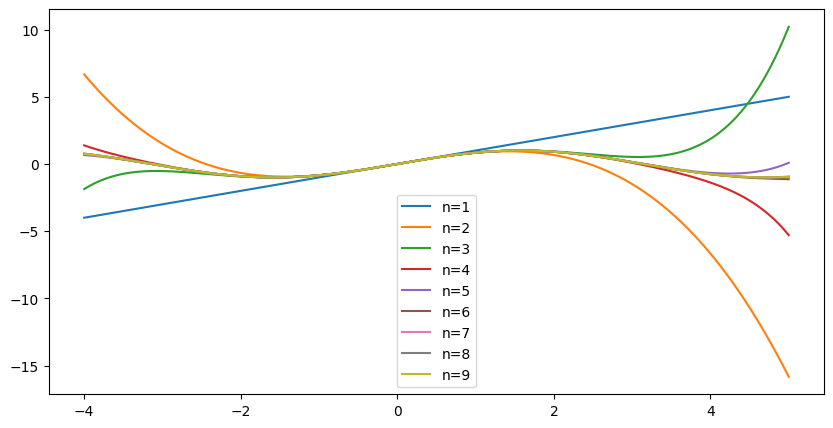

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(-4, 5, 1000)
plt.figure(figsize=(10, 5))

for i in range(1, 10):
    f = sin(i)
    f_lambda = sp.lambdify(x, f)
    ys = f_lambda(xs)
    plt.plot(xs, ys, label=f"n={i}")
plt.legend()

In [5]:
import sympy as sp
from sympy.abc import x, k, n, lamda
lamda = sp.Symbol('lamda', positive=True)
k = sp.Symbol('k', positive=True)
weibull = (lamda)**(-1) * k * (x/lamda)**(k-1) * sp.exp(-x**k/lamda**k)

weibull

k*(x/lamda)**(k - 1)*exp(-x**k/lamda**k)/lamda

In [12]:
cdf = sp.integrate(weibull, (x, 0, x))
sp.simplify(cdf)

1 - exp(-x**k/lamda**k)

In [13]:
weibull_lambda = sp.lambdify((x, lamda, k), weibull)
cdf_lambda = sp.lambdify((x, lamda, k), cdf)

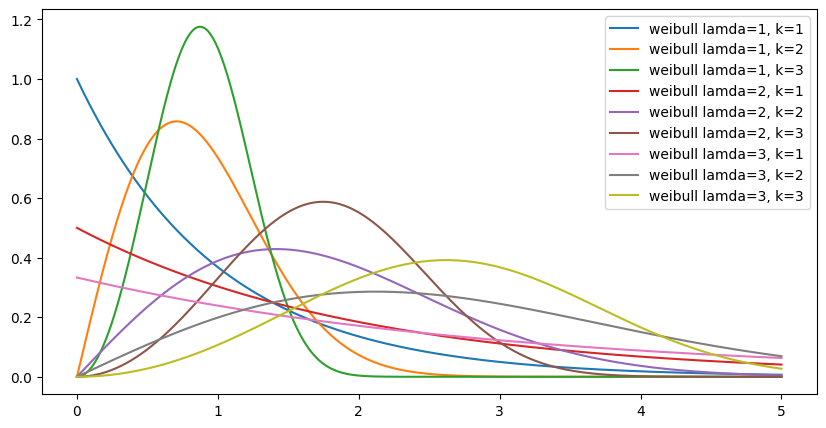

In [14]:
lamdas = [1, 2, 3]
ks = [1, 2, 3]
xs = np.linspace(0, 5, 1000)

plt.figure(figsize=(10, 5))
for lamda_ in lamdas:
    for k_ in ks:
        plt.plot(xs, weibull_lambda(xs, lamda_, k_), label=f"weibull lamda={lamda_}, k={k_}")
plt.legend()

In [15]:
# normal distribution mu sigma
from sympy.abc import mu,sigma

N = sp.exp(-(x-mu)**2/(2*sigma**2)) / (sigma*sp.sqrt(2*sp.pi))

N

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

In [16]:
N_lambda = sp.lambdify((x, mu, sigma), N)

(-3.3, 3.3, -0.015292669174672867, 0.41864671773076634)

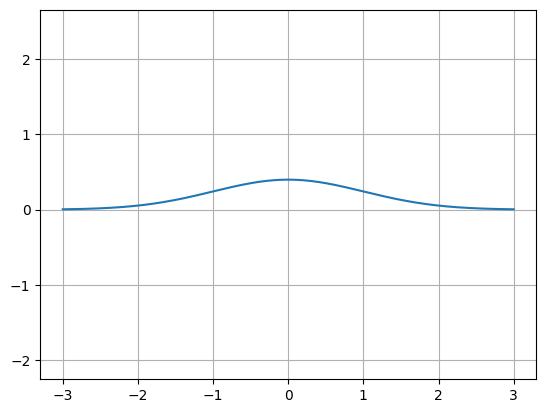

In [17]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
mus = [0]
sigmas = [1]

xs = np.linspace(-3,3, 300)

for mu_, sigma_ in product(mus, sigmas):
    plt.plot(xs, sp.lambdify(x, N.subs({mu: mu_, sigma: sigma_}))(xs), label=f"mu={mu_}, sigma={sigma_}")
plt.grid()
plt.axis('equal')

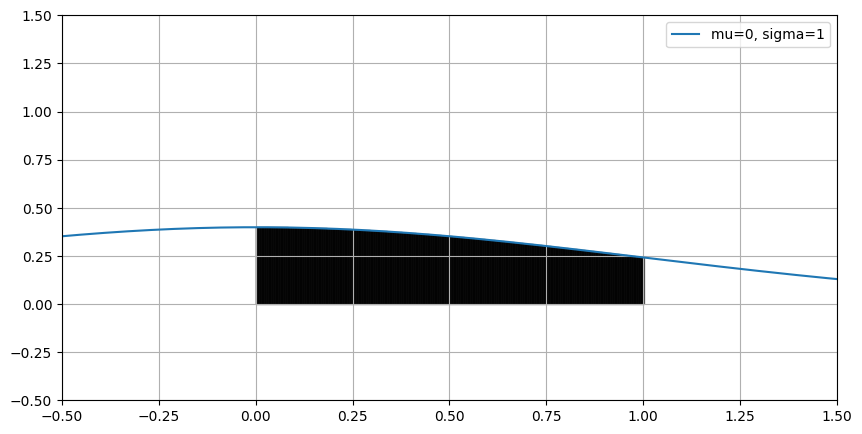

In [18]:
riemann_xs = np.linspace(0, 1, 1000)

plt.figure(figsize=(10, 5))
ax = plt.gca()

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5, 1.5])

tally = 0
for i, xi in enumerate(riemann_xs):
    yi = N_lambda(xi, 0, 1)
    ax.add_patch(plt.Rectangle((xi, 0), 1/len(riemann_xs), yi, color='black', alpha=0.5))
    # plt.plot([xi, xi], [0, yi], color='black', alpha=0.5)
    tally += yi * 1/len(riemann_xs)

for mu_, sigma_ in product(mus, sigmas):
    ax.plot(xs, sp.lambdify(x, N.subs({mu: mu_, sigma: sigma_}))(xs), label=f"mu={mu_}, sigma={sigma_}")
    # plt.plot(xs, sp.lambdify(x, N.subs({mu: mu_, sigma: sigma_}))(xs), label=f"mu={mu_}, sigma={sigma_}")

plt.grid()
# plt.axis('equal')
plt.legend()

In [19]:
tally * 2

0.6826476752810446

In [20]:
import scipy.stats as stats

# Probability of lying within one standard deviation of the mean
prob = stats.norm.cdf(1) - stats.norm.cdf(-1)
print(f"The probability of lying within one standard deviation of the mean is {prob:.4f}")


The probability of lying within one standard deviation of the mean is 0.6827


In [21]:
import requests
base = "https://patrickwalls.github.io/mathematicalpython/"
req = requests.get(base)

In [22]:
req.text

'\n<!doctype html>\n<html lang="en" class="no-js">\n  <head>\n    \n      <meta charset="utf-8">\n      <meta name="viewport" content="width=device-width,initial-scale=1">\n      \n      \n      \n      <link rel="icon" href="assets/images/favicon.png">\n      <meta name="generator" content="mkdocs-1.3.1, mkdocs-material-8.3.9">\n    \n    \n      \n        <title>Mathematical Python</title>\n      \n    \n    \n      <link rel="stylesheet" href="assets/stylesheets/main.1d29e8d0.min.css">\n      \n        \n        <link rel="stylesheet" href="assets/stylesheets/palette.cbb835fc.min.css">\n        \n          \n          \n          <meta name="theme-color" content="#ffffff">\n        \n      \n      \n    \n    \n    \n      \n        \n        \n        <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>\n        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto:300,300i,400,400i,700,700i%7CRoboto+Mono:400,400i,700,700i&display=fallback">\n 

In [23]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(req.text, 'html.parser')

In [24]:
for link in soup.find_all('a'):
    print(link.get('href'))

#mathematical-python
.
https://github.com/patrickwalls/mathematicalpython
.
https://github.com/patrickwalls/mathematicalpython
.
#prerequisites
#author
#feedback
#acknowledgements
#license
#last-modified
jupyter/notebook/
jupyter/markdown/
jupyter/latex/
python/numbers/
python/variables/
python/sequences/
python/functions/
python/logic/
python/loops/
scipy/numpy/
scipy/matplotlib/
root-finding/root-finding/
root-finding/bisection/
root-finding/secant/
root-finding/newton/
integration/integrals/
integration/riemann-sums/
integration/trapezoid-rule/
integration/simpsons-rule/
differentiation/differentiation/
differential-equations/first-order/
differential-equations/numerical-methods/
differential-equations/systems/
linear-algebra/linear-algebra-scipy/
linear-algebra/solving-linear-systems/
linear-algebra/eigenvalues-eigenvectors/
linear-algebra/applications/
problems/problems/
#prerequisites
#author
#feedback
#acknowledgements
#license
#last-modified
https://github.com/patrickwalls/math

In [25]:
dat = dict()

for link in soup.find_all('a')[12:40]:
    req = requests.get(base+link.get('href'))
    soup = BeautifulSoup(req.text, 'html.parser')
    print(soup.find_all('p')[0].text)
    TEX += '\\section{\\href{' + base + link.get('href') + '}{' + link.get('href') + '}}\n'
    TEX += soup.find_all('p')[0].text + '\n'
    TEX += '\\vspace{1cm}\n'
    # dat[link.get('href')] = soup.find_all('p')[0].text


Jupyter Notebook is a web application for creating and sharing documents that contain live code, equations, visualizations and explanatory text.
Markdown is a simple text-to-HTML markup language written in plain text. Jupyter notebook recognizes markdown and renders markdown code as HTML. See Markdown (by John Gruber) and GitHub Markdown Help for more information.
LaTeX is a programming environment for producing scientific documents. Jupyter notebook recognizes LaTeX code written in markdown cells and renders the mathematical symbols in the browser using the MathJax JavaScript library.
The main numeric types in Python are integers, floating point numbers (or floats) and complex numbers. The syntax for arithmetic operators are: addition +, subtraction -, multiplication *, division / and exponentiation **.
Just like the familiar variables $x$ and $y$ in mathematics, we use variables in programming to easily manipulate values. The assignment operator = assigns values to variables in Pytho

In [26]:
dat

{}

In [27]:
req = requests.get('https://en.wikipedia.org/wiki/Power_series')

In [28]:
soup = BeautifulSoup(req.text, 'html.parser')

In [37]:
# soup

In [30]:
import re
# get the indices of all the matches, then gett the text after th ematch
ct = 0 
for m in re.finditer(r'displaystyle', soup.text):
    ct+=1
    # if ct>=3:
    #     break
    # print(m.start(), m.end())
    # print(''.join(soup.text[m.end():].split('\dots')[0].split('=')[:-1]))
    try:
        parsed = parse_latex('='.join(soup.text[m.end():].split('\dots')[0].split('=')[:-1]))
        display(parsed)
    except Exception as e:
        # print(e)
        pass


In [31]:
from sympy.parsing.latex import parse_latex

parsed = parse_latex('x^2 + 2x + 1')

display(parsed)

(x**2 + 2*x) + 1

In [32]:
parse_latex(r'\frac{1}{2}')

1/2

In [36]:
req = requests.get('https://en.wikipedia.org/wiki/List_of_mathematical_series')

soup = BeautifulSoup(req.text, 'html.parser')

# soup

In [34]:
ct = 0
for x in re.finditer(r'\\displaystyle', soup.text):
    ct += 1
    if ct > 55:
        print(ct)
        try:
            parsed = parse_latex(soup.text[x.end():x.end()+120].split('=\\')[0].split(',')[0])
            TEX += '\\subsection{}\n'
            TEX += '\\begin{align*}\n'
            TEX += sp.latex(parsed) + '\n'
            TEX += '\\end{align*}\n'
            TEX += '\\vspace{1cm}\n'
            display(parsed)
        except:
            pass
    

56


Sum(((-1)**k*(E_{2*k}*z**(2*k)))/factorial(2*k), (k, 0, oo))

57


Sum((E_{2*k}*z**(2*k))/factorial(2*k), (k, 0, oo))

58


Sum(((-1)**(k - 1)*z**(2*k))/factorial(2*k), (k, 1, oo))

59


Sum(((-1)**(k - 1)*z**(2*k))/((2*factorial(2*k))), (k, 1, oo))

60


Sum((z**(2*k + 1)*factorial(2*k))/((2**(2*k)*((2*k + 1)*factorial(k)**2))), (k, 0, oo))

61


Sum(((-1)**k*(z**(2*k + 1)*factorial(2*k)))/((2**(2*k)*((2*k + 1)*factorial(k)**2))), (k, 0, oo))

62


Sum(((-1)**k*z**(2*k + 1))/(2*k + 1), (k, 0, oo))

63


Sum(z**(2*k + 1)/(2*k + 1), (k, 0, oo))

64


Sum(((-1)**(k - 1)*(z**(2*k)*factorial(2*k)))/((2**(2*k + 1)*k(factorial(k))**2)), (k, 1, oo)) + log(2, E)

65
66


Eq(Sum(z**k*(factorial(4*k)/((2**(4*k)*(sqrt(2)*(factorial(2*k)*factorial(2*k + 1)))))), (k, 0, oo)), sqrt((1 - sqrt(1 - z))/z))

67


Sum(z**(2*k + 2)*((2**(2*k)*factorial(k)**2)/(((k + 1)*factorial(2*k + 1)))), (k, 0, oo))

68


Sum(z**(2*n)*(Product(alpha**2 + 4*k**2, (k, 0, n - 1))/factorial(2*n)), (n, 0, oo))

69


(z + 1)**alpha

70


Eq(Sum(z**k*((choose*k)*((alpha + k) - 1)), (k, 0, oo)), 1/((1 - z)**alpha))

71


Eq(Sum((z**k*(2*(k*(choose*k))))/(k + 1), (k, 0, oo)), (1 - sqrt(1 - 4*z))/((2*z)))

72


Eq(Sum(z**k*(2*(k*(choose*k))), (k, 0, oo)), 1/(sqrt(1 - 4*z)))

73


Eq(Sum(z**k*(alpha*(choose*k) + 2*k), (k, 0, oo)), ((1 - sqrt(1 - 4*z))/((2*z)))/(sqrt(1 - 4*z)))

74


H(x)

75


Eq(Sum(H_{k}*z**k, (k, 1, oo)), (-log(1 - z, E))/(1 - z))

76


Eq(Sum(z**(k + 1)*(H_{k}/(k + 1)), (k, 1, oo)), log(1 - z, E)**2/2)

77


Eq(Sum(z**(2*k + 1)*(((-1)**(k - 1)*H_{2*k})/(2*k + 1)), (k, 1, oo)), (log(z**2 + 1, E)*atan(z))/2)

78


Eq(Sum(((-1)**k/(2*k + 1))*(z**(4*n + 2)/(4*n + 2)), (k, 0, 2*n), (n, 0, oo)), atan(z)/4)

79


Eq(Sum(x**2/((n**2*(n + x))), (n, 0, oo)), x*(pi**2/6) - H(x))

80


Eq(Sum(n*(choose*k), (k, 0, n)), 2**n)

81


Eq(Sum((-1)**k*(n*(choose*k)), (k, 0, n)), 0)

82


Eq(Sum(k*(choose*m), (k, 0, n)), (1*(choose*m) + n) + 1)

83


Eq(Sum(-choose*k + (k + m), (k, 0, n)), m*(choose*n) + n)

84


Eq(Sum((alpha*(choose*k))*(beta*(choose*n) - k), (k, 0, n)), alpha + beta*(choose*n))

85
86


Eq(Sum(sin(k*theta)/k, (k, 1, oo)), (pi - theta)/2)

87


Eq(Sum(((-1)**(k - 1)/k)*cos(k*theta), (k, 1, oo)), log(2*cos(theta) + 2, E)/2)

88


Eq(Sum(((-1)**(k - 1)/k)*sin(k*theta), (k, 1, oo)), theta/2)

89


Eq(Sum(cos(2*(k*theta))/((2*k)), (k, 1, oo)), -1*log(2*sin(theta), E)/2)

90


Eq(Sum(sin(2*(k*theta))/((2*k)), (k, 1, oo)), (pi - 2*theta)/4)

91


Eq(Sum(cos(theta*(2*k + 1))/(2*k + 1), (k, 0, oo)), log(cot(theta/2), E)/2)

92


Eq(Sum(sin(theta*(2*k + 1))/(2*k + 1), (k, 0, oo)), pi/4)

93


Sum(sin(2*(pi*(k*x)))/k, (k, 1, oo))

94
95
96


Eq(B_{n}(x), -factorial(n)/((2**(n - 1)*pi**n))*Sum(1/(k**n), (k, 1, oo)))

97
98
99


Sum(sin((k*pi)/n), (k, 1, n - 1))

100


Eq(Sum(sin((2*(k*pi))/n), (k, 1, n - 1)), 0)

101


Eq(Sum(csc(theta + (k*pi)/n)**2, (k, 0, n - 1)), n**2*csc(n*theta)**2)

102


Eq(Sum(csc((k*pi)/n)**2, (k, 1, n - 1)), (n**2 - 1)/3)

103


Eq(Sum(csc((k*pi)/n)**4, (k, 1, n - 1)), ((n**4 + 10*n**2) - 11)/45)

104


Eq(Sum(a/(-a**2 + n**2), (n, a + 1, oo)), H_{2*a}/2)

105


Eq(Sum(1/(a**2 + n**2), (n, 0, oo)), (a*(pi*coth(a*pi)) + 1)/((2*a**2)))

106


Eq(displaystyle*Sum(1/(4*a**4 + n**4), (n, 0, oo)), 1/(8*a**4))

107
108


n

109
110
111


Eq(displaystyle*Sum(e**(-n**2*pi), (n, -oo, oo)), pi**(1/4)/Gamma(3/4))

112


Eq(Sum(e**(-n**2*pi), (n, -oo, oo)), pi**(1/4)/Gamma(3/4))

113


Eq(Sum((-1)**(k + 1)/k, (k, 1, oo)), cdots + (-1/4 + (1/3 + (-1/2 + 1/1))))

114


False

115


Eq(Sum(1/factorial(k), (k, 0, oo)), c + (1/factorial(4) + (1/factorial(3) + (1/factorial(2) + (1/factorial(0) + 1/factorial(1))))))

116


False

117


False

118


False

119


False

120


False

121
122


Eq(Sum((-1)**k/(k**2 + 1), (k, 1, oo)), cdots + (((-1/2 + 1/5) - 1/10) + 1/17))

123


4/(((6*7)*8)) + (-4/((4*5)*6) + (4/(((2*3)*4)) + 3))

124


Eq(Sum(1/T_{k}, (k, 1, oo)), c + (1/15 + (1/10 + (1/6 + (1/3 + 1/1)))))

125


T_{n}

126


Eq(Sum(1/(T*e_{k}), (k, 1, oo)), 1/35 + (1/20 + (1/10 + (1/4 + 1/1))))

127


T*e_{n}

128


False

129


False

130
131
132


Eq(f(x), pi/4)

133
134


pi/4

135
136


pi/4

In [35]:
with open('lab33.tex', 'w') as f:
    f.write(START_TEX + TEX + END_TEX)